In [ ]:
!pip install fastai --upgrade -q/


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -/


In [ ]:
# 86.4% accuracy - not too shabby

In [ ]:
from fastai.vision.all import *

In [ ]:



from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
path = Path("/content/drive/MyDrive/skin/train")

In [ ]:
benign_images = get_image_files(path/"benign")
len(benign_images)

1450

In [ ]:
malignant_images = get_image_files(path/"malignant")
len(malignant_images)

1197

In [ ]:
fnames = get_image_files(path)
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, item_tfms=Resize(224))

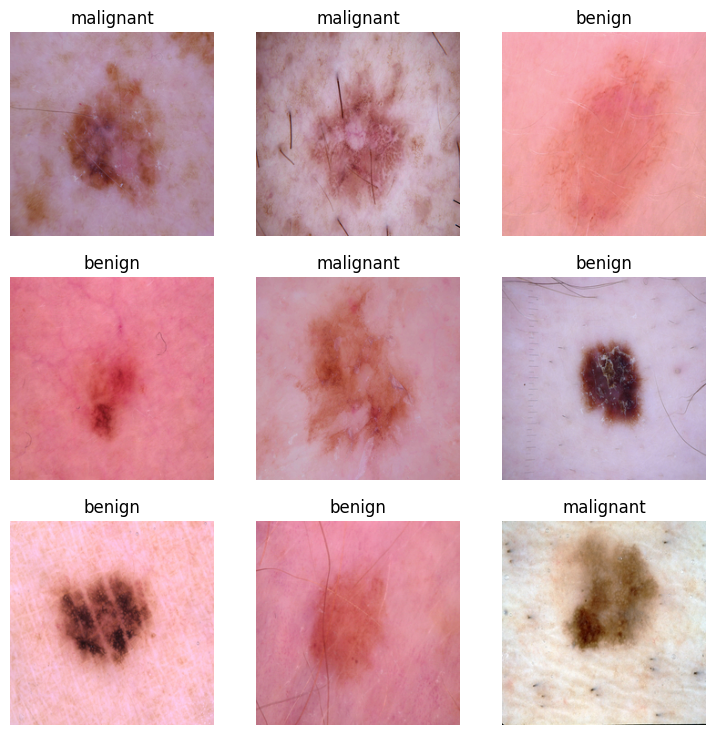

In [ ]:
dls.show_batch()

In [ ]:
learn = visual_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(0)
learn.show_results()
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pt

epoch,train_loss,valid_loss,error_rate,time
0,0.754852,0.472779,0.153119,07:27


epoch,train_loss,valid_loss,error_rate,time
0,0.427340,0.362055,0.136106,10:56


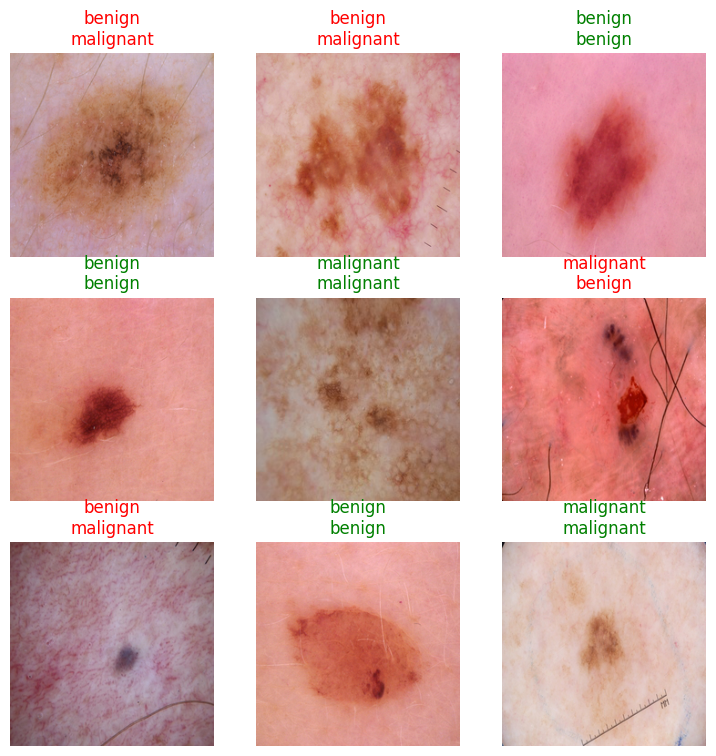

In [ ]:
learn.show_results()

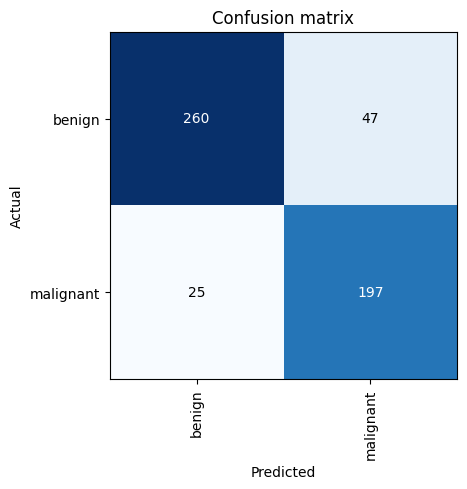

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

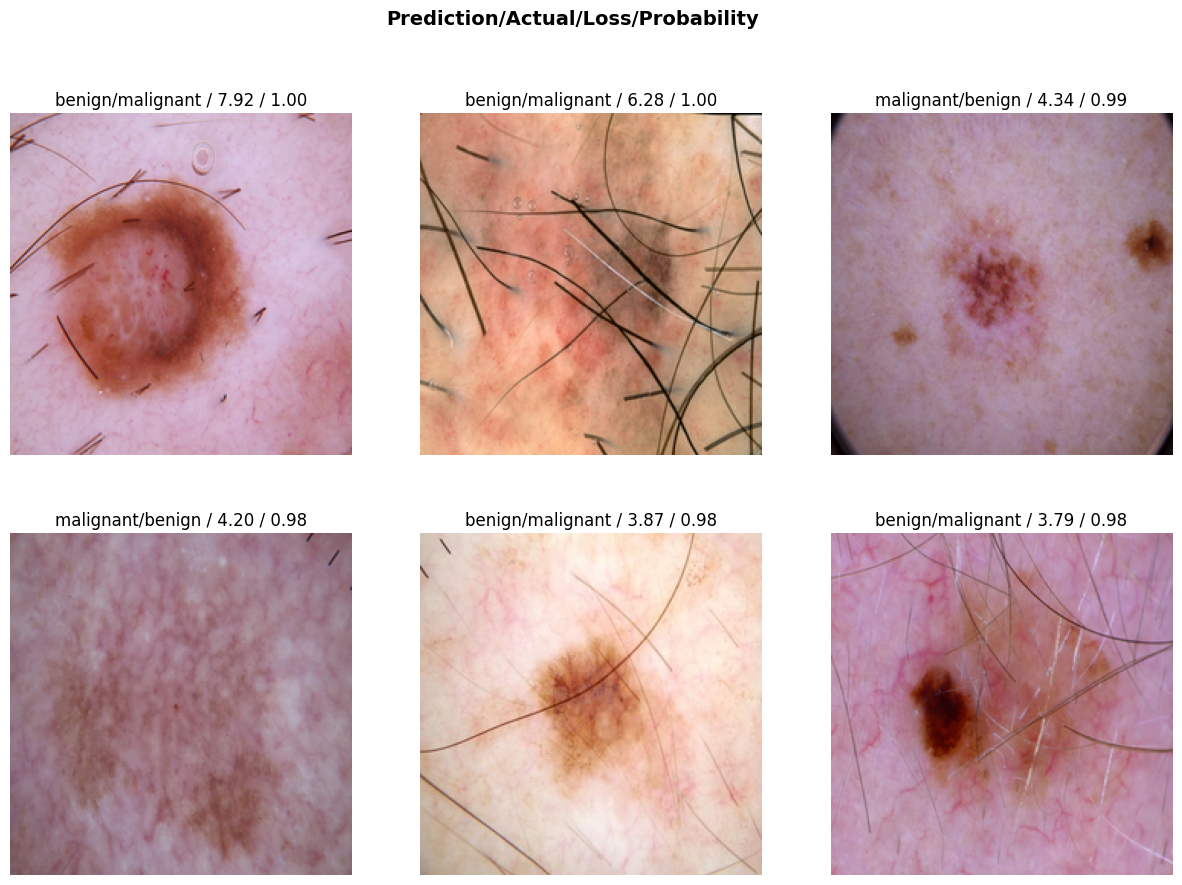

In [ ]:


interp.plot_top_losses(6, figsize=(15,10))

In [ ]:
#
import pickle
learn.export('model1.pth')


In [ ]:
import gc
import pickle
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

pick_insert = open('drive/My Drive/model.pkl','wb')
pickle.dump(learn, pick_insert)
pick_insert.close()


Mounted at /content/drive


In [ ]:
drive.mount('/content/drive', force_remount=True)

#save_model('drive/My Drive/test.pkl', learn,  opt = null)


Mounted at /content/drive


In [ ]:
#learn.save("howthisworks")

In [ ]:
def load_model():
  from google.colab import drive
  drive.mount("/content/drive/")
  path = Path("/content/drive/MyDrive/skin/train/model.pkl")
  learn = load_learner(path, 'model.pkl')
  return learn


print(load_model())


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = Path("/content/drive/MyDrive/skin/train/model.pkl")
learn_inf = load_learner(path)
from PIL import Image
img = PILImage.create("8.jpg")
print(type(img))
pred,pred_idx,probs = learn_inf.predict(img)
print(pred)

<class 'fastai.vision.core.PILImage'>


benign


In [ ]:
!pip install fastai --upgrade -q/
from fastai.vision.all import *
from google.colab import drive
drive.mount("/content/drive/")
path = Path("/content/drive/MyDrive/skin/train")
benign_images = get_image_files(path/"benign")
malignant_images = get_image_files(path/"malignant")
fnames = get_image_files(path)
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, item_tfms=Resize(224))
learn = cnn_learner(dls, alexnet, metrics=error_rate)
learn.fine_tune(0)
learn.show_results()
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
pick_insert = open('drive/My Drive/pop.pkl','wb')
pickle.dump(learn, pick_insert)
pick_insert.close()
path = Path("/content/drive/MyDrive/skin/train")
learn.load(path/"model1")
path = Path("/content/drive/MyDrive/skin/train/model.pkl")
learn_inf = load_learner(path)
from PIL import Image
img = PILImage.create("8.jpg")
print(type(img))
pred,pred_idx,probs = learn_inf.predict(img)
print(pred)